In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import gzip

In [5]:
suppl = Chem.SDMolSupplier('data/actives_final.sdf')
drugs = [m for m in suppl if not m == None] 

In [6]:
decoySet = Chem.SDMolSupplier('data/decoys_final.sdf')
decoys = [m for m in suppl if not m == None] 

In [7]:
drugbank = Chem.SDMolSupplier('data/drugbank.sdf')
drugBankMol = [m for m in drugbank if not m == None] 

In [8]:
ethan_ol = Chem.MolFromSmarts('CCO') 
propanol = Chem.MolFromSmiles('CCCO')
propanol.HasSubstructMatch(ethan_ol)

True

In [9]:
toluen = Chem.MolFromSmarts('Cc1ccccc1')
toluen.HasSubstructMatch(ethan_ol)

False

In [10]:
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

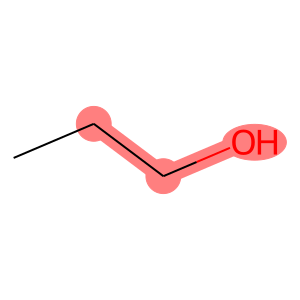

In [11]:
visualize_match(propanol, ethan_ol)

In [14]:
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
hasCarbo = [m for m in drugBankMol if m.HasSubstructMatch(cooh_pattern)]
len(hasCarbo)

1635

In [15]:
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
hasCarbo = [m for m in suppl if m.HasSubstructMatch(cooh_pattern)]
len(hasCarbo)

0

In [19]:
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
hasCarbo = [m for m in decoys if m.HasSubstructMatch(cooh_pattern)]
len(hasCarbo)

0

In [22]:
benz_pattern = Chem.MolFromSmarts('c1ccccc1')
hasCarbo = [m for m in suppl if m.HasSubstructMatch(cooh_pattern)]
len(hasCarbo)/ len(suppl)

0.975517890772128

In [24]:
benz_pattern = Chem.MolFromSmarts('c1ccccc1')
hasBenz = [m for m in decoys if m.HasSubstructMatch(benz_pattern)]
len(hasBenz)

518

In [20]:
benz_pattern = Chem.MolFromSmarts('c1ccccc1')
hasCarbo = ((m, len(m.GetSubstructMatches(benz_pattern))) for m in drugs)
list(filter(lambda x : x[1] == 0, hasCarbo))

[(<rdkit.Chem.rdchem.Mol at 0x1aa53da3d50>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53da4260>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53da46c0>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53da4800>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53da8170>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53dab6c0>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53dab710>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53dab8f0>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53dab940>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53dab990>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53dac580>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53dac5d0>, 0),
 (<rdkit.Chem.rdchem.Mol at 0x1aa53dac800>, 0)]

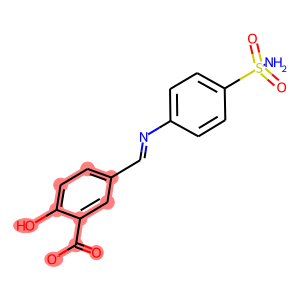

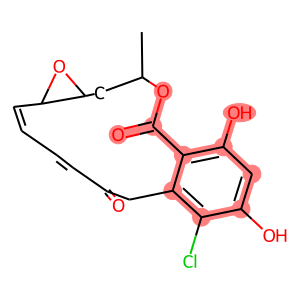

In [37]:
salicylic_acid_pattern = Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O')
# get all salicylic acid derivates from DrugBank
drugbank_salicylics = [m for m in suppl if m.HasSubstructMatch(salicylic_acid_pattern)]
for sal in drugbank_salicylics: visualize_match(sal, salicylic_acid_pattern)

In [23]:
from itertools import chain
# load PAINS structures in SMARTS format from two files in data
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags

In [29]:
# pain structures in my actives
hasPattern = []
for p in pains:
    hasPain = list(filter(lambda x : x[1] > 0,((m, len(m.GetSubstructMatches(p[0]))) for m in drugs)))
    if len(hasPain) > 0 : hasPattern.append(hasPain)
hasPattern

[[(<rdkit.Chem.rdchem.Mol at 0x1aa53da63a0>, 1),
  (<rdkit.Chem.rdchem.Mol at 0x1aa53da63f0>, 1)],
 [(<rdkit.Chem.rdchem.Mol at 0x1aa53da9e90>, 1)]]